In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

/home/pivithurua/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pivithurua/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pivithurua/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pivithurua/.local/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

#### sample data

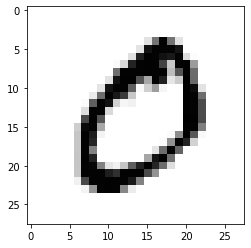

In [3]:
plt.imshow(x_train[1], cmap='Greys')

#### dataset dimensions

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


#### reshaping

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### normalizing

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### model

In [12]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(7,7), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

#### compile model

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1487 - acc: 0.9546
Epoch 2/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0563 - acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0386 - acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0297 - acc: 0.9906
Epoch 5/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0241 - acc: 0.9921
Epoch 6/10
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0184 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0169 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0140 - acc: 0.9956
Epoch 9/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0128 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 14s 2

#### evaluate model

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0389 - acc: 0.9904


[0.03894233042496158, 0.9904]